# Linear Regression
- Linear Regression에 대한 자세한 내용보다는, 간단한 Regression 을 예제를 통해 Tensorflow 2.0을 익히기 위한 notebook 입니다.
- Loss Function: MSE

In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
print(tf.__version__)

2.7.0


In [2]:
# Data Generation
X_data = np.array([[1, 2, 0], [5, 4, 3], [1, 2, -1], [3, 1, 0], [2, 4, 2],
                 [4, 1, 2], [-1, 3, 2], [4, 3, 3], [0, 2, 6], [2, 2, 1],
                 [1, -2, -2], [0, 1, 3], [1, 1, 3], [0, 1, 4], [2, 3, 3]])

Y_data = np.array([-4, 4, -6, 3, -4,
                  9, -7, 5, 6, 0,
                  4, 3, 5, 5, 1])

print("X_data shape = {}, Y_data shape = {}".format(X_data.shape, Y_data.shape))

X_data shape = (15, 3), Y_data shape = (15,)


In [3]:
# Modeling
model = Sequential()
model.add(Dense(1, input_shape=(3, ), activation='linear'))

2021-11-06 14:56:17.865830: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Compiling
model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')

# Confirmation
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [5]:
# training
trained_model = model.fit(X_data, Y_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 226ms/step - loss: 21.5682
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 20.4882
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 19.4827
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 18.5372
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 17.6434
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 16.7960
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 15.9912
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 15.2263
Epoch 9/1000
1/1 [==============================] - 0s 3ms/step - loss: 14.4990
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 13.8070
Epoch 11/1000
1/1 [==============================] - 0s 3ms/step - loss: 13.1486
Epoch 12/1000
1/1 [==============================] - 0s 3ms/step - loss: 12.5221
Epoch 13/1000
1/1 [================

In [6]:
print(trained_model.params)

{'verbose': 1, 'epochs': 1000, 'steps': 1}


In [7]:
# Testing

#Test Data X
test_x = [[5, 5, 0], [2, 3, 1], [-1, 0, -1], [10, 5, 2], [4, -1, -2]]
#정답
test_y = [2*data[0]-3*data[1]+2*data[2] for data in test_x]
#예측값
prediction_y = model.predict(np.array(test_x))
print("우리의 예측값: {}".format(prediction_y))
print("정답 y: {}".format(test_y))


우리의 예측값: [[-4.999913 ]
 [-3.0000277]
 [-4.0002227]
 [ 9.0002575]
 [ 6.999865 ]]
정답 y: [-5, -3, -4, 9, 7]


### 모델 해석

In [8]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name='dense_input'), name='dense_input', description="created by layer 'dense_input'")


In [9]:
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/BiasAdd:0', description="created by layer 'dense'")


In [10]:
print(model.weights)

[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 2.0000265],
       [-2.9999738],
       [ 2.0000188]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-0.00017761], dtype=float32)>]


### Loss Function 살펴보기

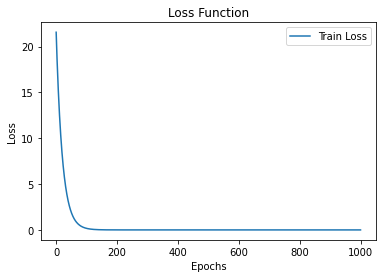

In [11]:
import matplotlib.pyplot as plt
plt.title("Loss Function")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.plot(trained_model.history['loss'], label='Train Loss')
plt.legend(loc='best')
plt.show()